In [1]:
import pandas as pd
import pyodbc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
              'Server=LAPTOP-AB644KQI\SQLEXPRESS;'
              'Database=LinkedIn;'
              'Trusted_Connection=yes;')
cursor = conn.cursor()

query='''
SELECT Title,Company, Location, Time_Published, EmploymentType, Industry, Level, JobFunc FROM Filtered_Jobs
'''
LinkedIn_df=pd.read_sql(query,conn)

In [3]:
LinkedIn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6572 entries, 0 to 6571
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           6572 non-null   object        
 1   Company         6572 non-null   object        
 2   Location        6572 non-null   object        
 3   Time_Published  6472 non-null   datetime64[ns]
 4   EmploymentType  4603 non-null   object        
 5   Industry        4602 non-null   object        
 6   Level           6569 non-null   object        
 7   JobFunc         4603 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 410.9+ KB


In [4]:
LI_csv=pd.read_csv('LinkedIn_df.csv')
LI_csv

,Unnamed: 0,Title,Company,SeniorityLevel,Location,Time,Industry,JobFunction,EmploymentType
0,0,Office Manager,StarkWare,Not Applicable,"Netanya, Center District, Israel",2023-02-19 08:22:23+00:00,Software Development,Administrative,Full-time
1,1,Software Dev Engineer Intern,Amazon Web Services (AWS),Not Applicable,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-19 12:00:55+00:00,"IT Services and IT Consulting, Software Develo...","Information Technology, Consulting, and Engine...",Full-time
2,2,Technical Customer Support,Comeet,Mid-Senior level,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-19 08:22:23+00:00,Software Development,Information Technology,Full-time
3,3,Junior Brand Manager,Ferrero,Mid-Senior level,"Holon, Tel Aviv District, Israel",2023-02-19 11:51:35+00:00,Manufacturing,Marketing and Sales,Full-time
4,4,Investment Research Analyst,eToro,Mid-Senior level,"Bnei Brak, Tel Aviv District, Israel",2023-02-19 08:25:27+00:00,Financial Services,"Research, Analyst, and Information Technology",Full-time
...,...,...,...,...,...,...,...,...,...
476,476,Sr. Embedded Engineer,CaPow,Full-time,"Beer Sheva, South District, Israel",2023-02-19 09:22:03+00:00,NaN,NaN,NaN
477,477,"מהנדס חומרה לקרונות שליטה במל""טים",Elbit Systems Ltd,Not Applicable,"Haifa, Haifa District, Israel",2023-02-19 11:02:30+00:00,Defense and Space Manufacturing,Other,Full-time
478,478,Senior Malware Anti-Cheat Research Architect,NVIDIA,Mid-Senior level,"Yokneam Ilit, North District, Israel",2023-02-18 18:32:46+00:00,"Computer Hardware Manufacturing, Software Deve...",Engineering,Full-time
479,479,Senior Mac Agent Developer,Proofpoint,Not Applicable,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-18 15:45:27+00:00,Software Development and Computer and Network ...,Sales and Business Development,Full-time


In [5]:
LI_csv['Time']=pd.to_datetime(LI_csv['Time'])
LI_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      481 non-null    int64              
 1   Title           481 non-null    object             
 2   Company         481 non-null    object             
 3   SeniorityLevel  481 non-null    object             
 4   Location        481 non-null    object             
 5   Time            470 non-null    datetime64[ns, UTC]
 6   Industry        271 non-null    object             
 7   JobFunction     271 non-null    object             
 8   EmploymentType  271 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 33.9+ KB


In [6]:
LI_csv.rename(columns={'SeniorityLevel':'Level','Time':'Time_Published','JobFunction':'JobFunc'},inplace=True)


In [7]:
LI_csv.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
LinkedIn_df=pd.concat([LinkedIn_df,LI_csv],ignore_index=True)

In [9]:
LinkedIn_df['Time_Published']=pd.to_datetime(LinkedIn_df['Time_Published'],utc=True)
LinkedIn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7053 entries, 0 to 7052
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Title           7053 non-null   object             
 1   Company         7053 non-null   object             
 2   Location        7053 non-null   object             
 3   Time_Published  6942 non-null   datetime64[ns, UTC]
 4   EmploymentType  4874 non-null   object             
 5   Industry        4873 non-null   object             
 6   Level           7050 non-null   object             
 7   JobFunc         4874 non-null   object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 440.9+ KB


In [10]:
LinkedIn_df.drop_duplicates(inplace=True,ignore_index=True)
LinkedIn_df

,Title,Company,Location,Time_Published,EmploymentType,Industry,Level,JobFunc
0,.NET Team Lead,Commit,Jerusalem,NaT,Full-time,Software Development,Mid-Senior level,Information Technology
1,219- Full Stack NET developer for Cyber & AI p...,AGAT Software,Jerusalem,NaT,None,None,Full-time,None
2,Architect,Mertens Hoffman - Malam Team,Jerusalem,NaT,None,None,Full-time,None
3,Business Intelligence Administrator,Mertens Hoffman - Malam Team,Jerusalem,NaT,None,None,Full-time,None
4,Business Intelligence System Analyst,Horizon Technologies LTD.,Jerusalem,NaT,None,None,Full-time,None
...,...,...,...,...,...,...,...,...
7041,Sr. Embedded Engineer,CaPow,"Beer Sheva, South District, Israel",2023-02-19 09:22:03+00:00,NaN,NaN,Full-time,NaN
7042,"מהנדס חומרה לקרונות שליטה במל""טים",Elbit Systems Ltd,"Haifa, Haifa District, Israel",2023-02-19 11:02:30+00:00,Full-time,Defense and Space Manufacturing,Not Applicable,Other
7043,Senior Malware Anti-Cheat Research Architect,NVIDIA,"Yokneam Ilit, North District, Israel",2023-02-18 18:32:46+00:00,Full-time,"Computer Hardware Manufacturing, Software Deve...",Mid-Senior level,Engineering
7044,Senior Mac Agent Developer,Proofpoint,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-18 15:45:27+00:00,Full-time,Software Development and Computer and Network ...,Not Applicable,Sales and Business Development


In [11]:
def Location(loc):
    l=loc.split(', ')
    if len(l)==3:
        return l[-2],l[-3]
    elif len(l)==2:
        return l[-2],None
    elif l[0]!='Israel':
        return f'{l[0]} District',l[0]
    else:
        return None,None

In [12]:
LinkedIn_df['District']=LinkedIn_df['Location'].apply(lambda x: Location(x)[0])
LinkedIn_df['City']=LinkedIn_df['Location'].apply(lambda x: Location(x)[1])

In [13]:
LinkedIn_df[LinkedIn_df['District'].isnull()]

,Title,Company,Location,Time_Published,EmploymentType,Industry,Level,JobFunc,District,City
102,מהנדס.ת איכות למערכות דירקם,Elbit Systems Ltd,Israel,2023-02-19 14:01:45+00:00,Full-time,Defense and Space Manufacturing,Not Applicable,Other,None,None
167,"SOC Engineer, I - 42673BR",Synopsys Inc,Israel,2023-02-19 15:11:20+00:00,Full-time,"Computer Hardware Manufacturing, Software Deve...",Entry level,"Design, Consulting, and Engineering",None,None
203,Intellectual Property Paralegal,FRESH,Israel,2023-02-19 17:50:20+00:00,None,None,Full-time,None,None,None
218,Chief Marketing Officer,Unidef,Israel,2023-02-19 20:12:25+00:00,None,None,Full-time,None,None,None
238,Senior Data Scientist,Triple Whale ??,Israel,2023-02-19 23:34:46+00:00,Full-time,Software Development,Mid-Senior level,Engineering and Information Technology,None,None
...,...,...,...,...,...,...,...,...,...,...
6944,Grocery Shift Lead - Hertzliya,Wolt,Israel,2023-02-18 12:01:48+00:00,Full-time,Software Development,Associate,General Business,None,None
6967,ראש.ת תחום הרכבות לייזרים,Elbit Systems Ltd,Israel,2023-02-19 08:02:08+00:00,Full-time,Defense and Space Manufacturing,Not Applicable,Other,None,None
6983,System Engineer\Communication Engineer,Elbit Systems Ltd,Israel,2023-02-19 11:08:43+00:00,Full-time,Defense and Space Manufacturing,Entry level,Information Technology,None,None
6996,Windows Internals Engineer - DBT,SentinelOne,Israel,2023-02-19 10:26:31+00:00,Full-time,Computer and Network Security,Not Applicable,Information Technology,None,None


In [14]:
LinkedIn_df[LinkedIn_df['City'].isnull()]

,Title,Company,Location,Time_Published,EmploymentType,Industry,Level,JobFunc,District,City
10,Content Editor,REIGNN.,"Tel Aviv District, Israel",NaT,None,None,None,None,Tel Aviv District,None
49,Product designer,Dun & Bradstreet (Israel) Ltd.,"Tel Aviv District, Israel",NaT,None,None,None,None,Tel Aviv District,None
102,מהנדס.ת איכות למערכות דירקם,Elbit Systems Ltd,Israel,2023-02-19 14:01:45+00:00,Full-time,Defense and Space Manufacturing,Not Applicable,Other,None,None
105,Avocat,Azoulay et Bloch,"Center District, Israel",2023-02-19 14:08:11+00:00,None,None,Full-time,None,Center District,None
107,Process Engineer,Ethosia,"Tel Aviv District, Israel",2023-02-19 14:11:41+00:00,Full-time,"Medical Equipment Manufacturing, Biotechnology...",Mid-Senior level,"Science, Engineering, and Manufacturing",Tel Aviv District,None
...,...,...,...,...,...,...,...,...,...,...
7026,Principal Software Engineer,Orca Security,"Tel Aviv District, Israel",2023-02-19 09:56:14+00:00,Full-time,"IT Services and IT Consulting, Software Develo...",Mid-Senior level,Engineering and Information Technology,Tel Aviv District,None
7027,Senior Software Engineer(full-stack),Hila Results inc.,"Tel Aviv District, Israel",2023-02-19 12:01:32+00:00,NaN,NaN,Full-time,NaN,Tel Aviv District,None
7029,מהנדס/מהנדסת אלקטרוניקה,C.R.G Electronics,"Center District, Israel",2023-02-19 11:01:27+00:00,NaN,NaN,Full-time,NaN,Center District,None
7034,Senior Frontend Engineer,Dropit Shopping,"Tel Aviv District, Israel",2023-02-19 11:02:24+00:00,NaN,NaN,Full-time,NaN,Tel Aviv District,None


In [15]:
for d in LinkedIn_df['District'].unique():
    if len(LinkedIn_df[LinkedIn_df['District']==d]['City'].isnull())>0:
        most_common=LinkedIn_df[LinkedIn_df['District']==d]['City'].mode().iloc[0]
        LinkedIn_df.loc[LinkedIn_df['District']==d]=LinkedIn_df[LinkedIn_df['District']==d].fillna({'City':most_common})


In [16]:
LinkedIn_df[LinkedIn_df['District']=='Jerusalem District']

,Title,Company,Location,Time_Published,EmploymentType,Industry,Level,JobFunc,District,City
0,.NET Team Lead,Commit,Jerusalem,NaT,Full-time,Software Development,Mid-Senior level,Information Technology,Jerusalem District,Jerusalem
1,219- Full Stack NET developer for Cyber & AI p...,AGAT Software,Jerusalem,NaT,None,None,Full-time,None,Jerusalem District,Jerusalem
2,Architect,Mertens Hoffman - Malam Team,Jerusalem,NaT,None,None,Full-time,None,Jerusalem District,Jerusalem
3,Business Intelligence Administrator,Mertens Hoffman - Malam Team,Jerusalem,NaT,None,None,Full-time,None,Jerusalem District,Jerusalem
4,Business Intelligence System Analyst,Horizon Technologies LTD.,Jerusalem,NaT,None,None,Full-time,None,Jerusalem District,Jerusalem
...,...,...,...,...,...,...,...,...,...,...
6938,Requirements Expert HF,Egis,"Jerusalem District, Israel",2023-02-19 00:15:20+00:00,Full-time,Civil Engineering,Mid-Senior level,Other,Jerusalem District,Jerusalem
6947,Algorithm Validation Engineer,Mobileye,"Jerusalem District, Israel",2023-02-19 10:46:40+00:00,Full-time,Motor Vehicle Manufacturing,Entry level,Engineering,Jerusalem District,Jerusalem
7016,Senior Backend Engineer - Feed,Lightricks,"Jerusalem District, Israel",2023-02-18 13:25:39+00:00,Full-time,Software Development,Mid-Senior level,Engineering and Information Technology,Jerusalem District,Jerusalem
7017,Embedded Software Engineer,Bioled Eco Light Systems Ltd.,"Mevaseret Zion, Jerusalem District, Israel",2023-02-19 12:36:06+00:00,NaN,NaN,Part-time,NaN,Jerusalem District,Mevaseret Zion


In [17]:
for index,row in LinkedIn_df[LinkedIn_df['Level'].isin(LinkedIn_df['EmploymentType'].unique())].iterrows():
    LinkedIn_df['EmploymentType'][index]=row.Level
    LinkedIn_df['Level'][index]=np.nan

C:\Users\shiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

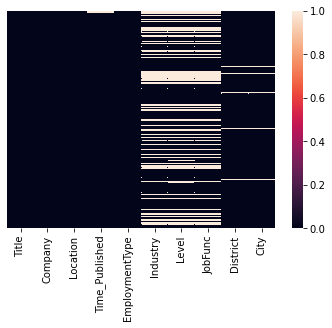

In [18]:
sns.heatmap(LinkedIn_df.isnull(),yticklabels=False)

In [19]:
LinkedIn_df.fillna(method='ffill',inplace=True)



<AxesSubplot:>

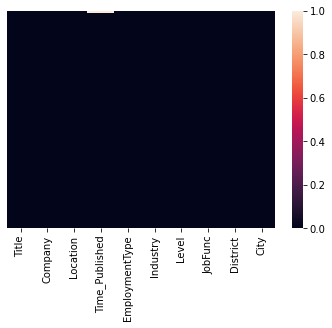

In [20]:
sns.heatmap(LinkedIn_df.isnull(),yticklabels=False)

In [21]:
LinkedIn_df.head()

,Title,Company,Location,Time_Published,EmploymentType,Industry,Level,JobFunc,District,City
0,.NET Team Lead,Commit,Jerusalem,NaT,Full-time,Software Development,Mid-Senior level,Information Technology,Jerusalem District,Jerusalem
1,219- Full Stack NET developer for Cyber & AI p...,AGAT Software,Jerusalem,NaT,Full-time,Software Development,Mid-Senior level,Information Technology,Jerusalem District,Jerusalem
2,Architect,Mertens Hoffman - Malam Team,Jerusalem,NaT,Full-time,Software Development,Mid-Senior level,Information Technology,Jerusalem District,Jerusalem
3,Business Intelligence Administrator,Mertens Hoffman - Malam Team,Jerusalem,NaT,Full-time,Software Development,Mid-Senior level,Information Technology,Jerusalem District,Jerusalem
4,Business Intelligence System Analyst,Horizon Technologies LTD.,Jerusalem,NaT,Full-time,Software Development,Mid-Senior level,Information Technology,Jerusalem District,Jerusalem


C:\Users\shiru\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jobs by Districts')

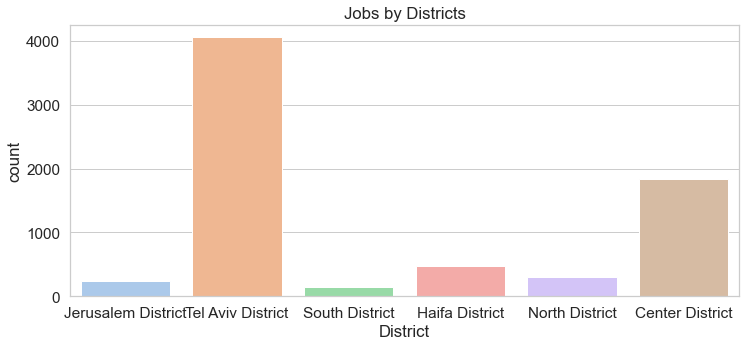

In [22]:
sns.set(style='whitegrid',font_scale=1.4)
plt.figure(figsize=(12,5))
sns.countplot(LinkedIn_df['District'],palette='pastel')
plt.title('Jobs by Districts')

In [23]:
grouped_DisLev=LinkedIn_df.groupby(['District','Level']).count().reset_index()
pivot=grouped_DisLev.pivot(index='District',columns='Level',values='Title')

pivotP=pivot.fillna(0).apply(lambda x: round(x/pivot.sum(axis=1)*100,2))
pivotP

Level,Associate,Director,Entry level,Executive,Mid-Senior level,Not Applicable,Volunteer
District,,,,,,,
Center District,12.48,4.14,14.93,1.36,44.36,22.67,0.05
Haifa District,6.18,2.13,16.20,1.92,38.17,35.39,0.00
Jerusalem District,12.55,1.62,27.13,3.24,48.18,7.29,0.00
North District,6.54,2.94,18.63,3.27,41.18,27.45,0.00
South District,12.32,1.45,21.74,0.72,37.68,26.09,0.00
Tel Aviv District,10.34,3.90,15.60,1.70,49.25,19.21,0.00


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Associate'),
  Text(1.5, 0, 'Director'),
  Text(2.5, 0, 'Entry level'),
  Text(3.5, 0, 'Executive'),
  Text(4.5, 0, 'Mid-Senior level'),
  Text(5.5, 0, 'Not Applicable'),
  Text(6.5, 0, 'Volunteer')])

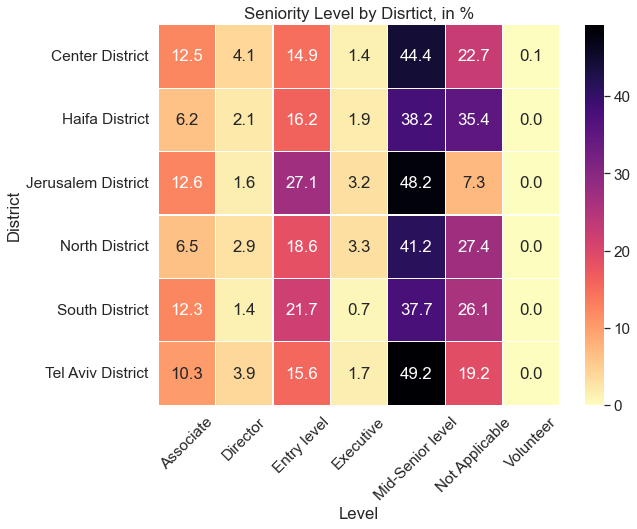

In [24]:
plt.figure(figsize=(9,7))
sns.heatmap(pivotP,cmap='magma_r',linecolor='white',linewidth=0.1,annot=True,fmt='.1f')
plt.title('Seniority Level by Disrtict, in %')
plt.xticks(rotation=45)

In [25]:
#from datetime import date
LinkedIn_df['DayofWeek']=LinkedIn_df['Time_Published'].dt.day_name()
LinkedIn_df['Hour']=LinkedIn_df['Time_Published'].dt.hour
LinkedIn_df['Date']=LinkedIn_df['Time_Published'].dt.date

C:\Users\shiru\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jobs by Weekdays')

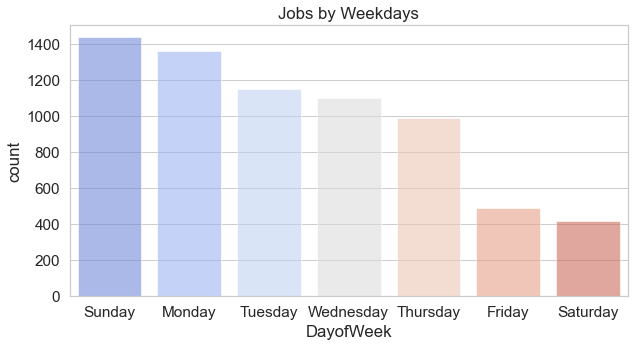

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(LinkedIn_df['DayofWeek'],palette='coolwarm',alpha=0.6)
plt.title('Jobs by Weekdays')

In [27]:
top_ind=LinkedIn_df['Industry'].value_counts().head(10).index
groupby_ind=LinkedIn_df[LinkedIn_df['Industry'].isin(top_ind)].groupby(['Industry','DayofWeek']).count().reset_index().sort_values('DayofWeek')
groupby_ind_pivot=groupby_ind.pivot('Industry','DayofWeek','Title')
ind_per=groupby_ind_pivot.apply(lambda x: round(x/groupby_ind_pivot.sum(axis=1)*100,2))
ind_per

DayofWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Industry,,,,,,,
Computer Games,6.67,16.67,7.78,20.00,22.22,13.89,12.78
Computer and Network Security,6.74,19.65,3.52,23.75,13.78,23.17,9.38
Computers and Electronics Manufacturing,11.76,22.06,4.41,8.82,10.29,25.00,17.65
Defense and Space Manufacturing,17.25,16.44,35.58,8.89,6.20,11.86,3.77
Financial Services,2.91,11.17,4.85,24.27,13.11,11.17,32.52
IT Services and IT Consulting,8.85,29.23,1.15,23.08,12.69,11.15,13.85
Medical Equipment Manufacturing,1.83,23.85,6.42,26.61,11.01,22.94,7.34
Motor Vehicle Manufacturing,7.36,15.58,10.39,26.84,10.82,17.75,11.26
Software Development,3.04,20.35,4.48,25.00,13.60,15.12,18.41


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Sunday'),
  Text(1.5, 0, 'Monday'),
  Text(2.5, 0, 'Tuesday'),
  Text(3.5, 0, 'Wednesday'),
  Text(4.5, 0, 'Thursday'),
  Text(5.5, 0, 'Friday'),
  Text(6.5, 0, 'Saturday')])

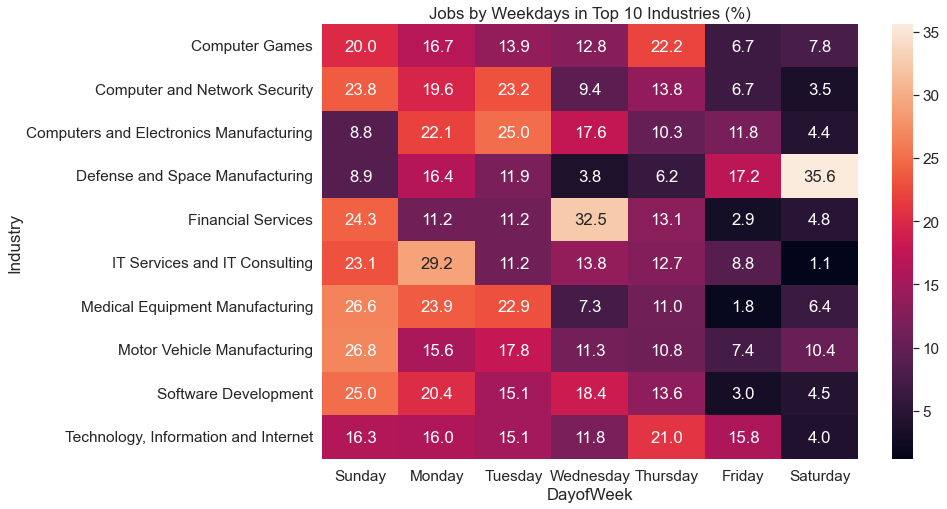

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(ind_per.loc[:,['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']],annot=True,fmt='.1f')
plt.title('Jobs by Weekdays in Top 10 Industries (%)')
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Jobs by Hours')

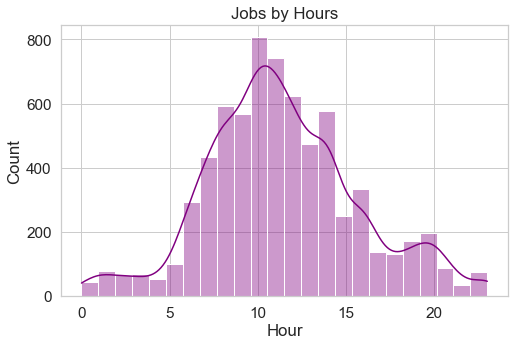

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(LinkedIn_df['Hour'],bins=24,color='purple',kde=True,alpha=0.4)
plt.title('Jobs by Hours')

(array([19407., 19409., 19411., 19413., 19415., 19417., 19419., 19421.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

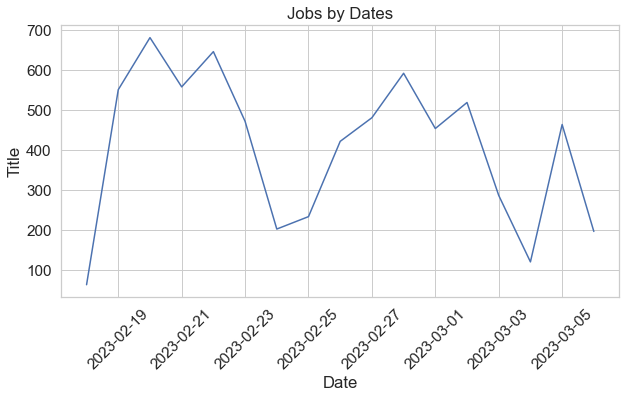

In [30]:
plt.figure(figsize=(10,5))
sns.set_style()
sns.lineplot(data=LinkedIn_df.groupby('Date').count(),x='Date',y='Title')
plt.title('Jobs by Dates')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Jobs by Dates')

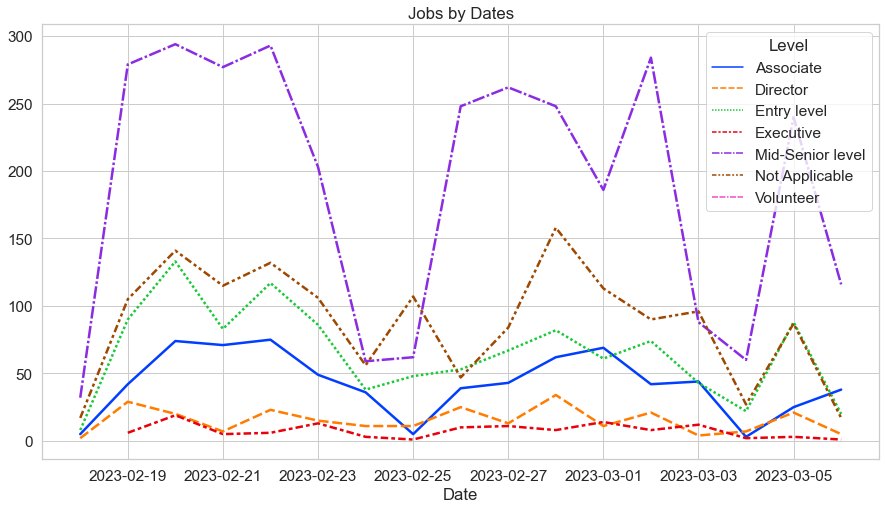

In [31]:
plt.figure(figsize=(15,8))
sns.set_style()
sns.lineplot(data=LinkedIn_df.groupby(['Date','Level']).count().reset_index().pivot('Date','Level','Title'),linewidth=2.5,palette='bright')
plt.title('Jobs by Dates')

In [32]:
def compare(jobA,jobB):
    A=LinkedIn_df[LinkedIn_df['Title'].str.contains(jobA)][['Title','Date']].groupby('Date').count()
    B=LinkedIn_df[LinkedIn_df['Title'].str.contains(jobB)][['Title','Date']].groupby('Date').count()
    by_jobs=pd.merge(A,B,on='Date',suffixes=(f'_{jobA}',f'_{jobB}'))
    return by_jobs,jobA,jobB

(array([19407., 19409., 19411., 19413., 19415., 19417., 19419., 19421.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

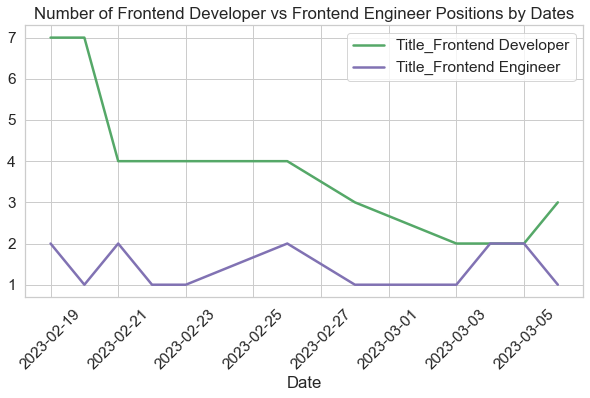

In [33]:
by_jobs,jobA,jobB=compare('Frontend Developer','Frontend Engineer')
by_jobs.plot(figsize=(10,5),title=f'Number of {jobA} vs {jobB} Positions by Dates',color=['g','m'],linewidth=2.5)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Tel Aviv-Yafo'),
  Text(1, 0, 'Petah Tikva'),
  Text(2, 0, 'Herzliya'),
  Text(3, 0, 'Haifa'),
  Text(4, 0, 'Ramat Gan'),
  Text(5, 0, 'Jerusalem'),
  Text(6, 0, 'Netanya'),
  Text(7, 0, 'Rosh HaAyin'),
  Text(8, 0, 'Raanana'),
  Text(9, 0, 'Rehovot')])

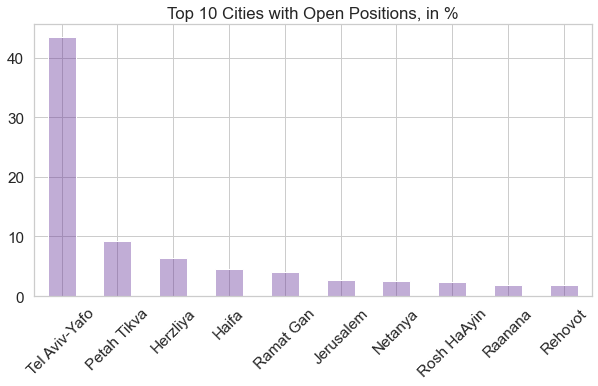

In [34]:
(LinkedIn_df['City'].value_counts()/len(LinkedIn_df)*100).head(10).plot(kind='bar',figsize=(10,5),color=(0.4, 0.2, 0.6, 0.4),title=('Top 10 Cities with Open Positions, in %'))
plt.xticks(rotation=45)

In [35]:
LinkedIn_df['City'].value_counts().head(10)
LinkedIn_df['Company'].value_counts().head(10)

Elbit Systems Ltd       323
Ethosia                 218
Agoda                   145
Innoviz Technologies    114
Moon Active             100
Fiverr                   94
Apple                    87
monday.com               64
Confidential             63
Mobileye                 62
Name: Company, dtype: int64